In [1]:
!pip install pyspark

  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767609 sha256=d267d7b0898010936a2717232cf59d80dd72fb4e5747319cd81e824a7d472d9a
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\b3\0e\81\264aeed961e43b9f6ba9ec81c8c540d2d7dccc52c6b51cbf22
Successfully built pyspark


In [40]:
import pandas as pd 
#ad = pd.read_csv('ad-clicks.csv',parse_dates=(['timestamp']))
#buy = pd.read_csv('buy-clicks.csv',parse_dates=(['timestamp']))
#game = pd.read_csv('game-clicks.csv', parse_dates=(['timestamp']))
#user_ses = pd.read_csv('user-session.csv')
cmb_dt = pd.read_csv('combined-data.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [ ]:
#barplot 
sns.barplot (x= 'price',y= 'buyId',order = ['Sun','Sat','Thur','Fri'],data = df, palette= 'Set1')

In [3]:
%matplotlib inline
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
plt.title()

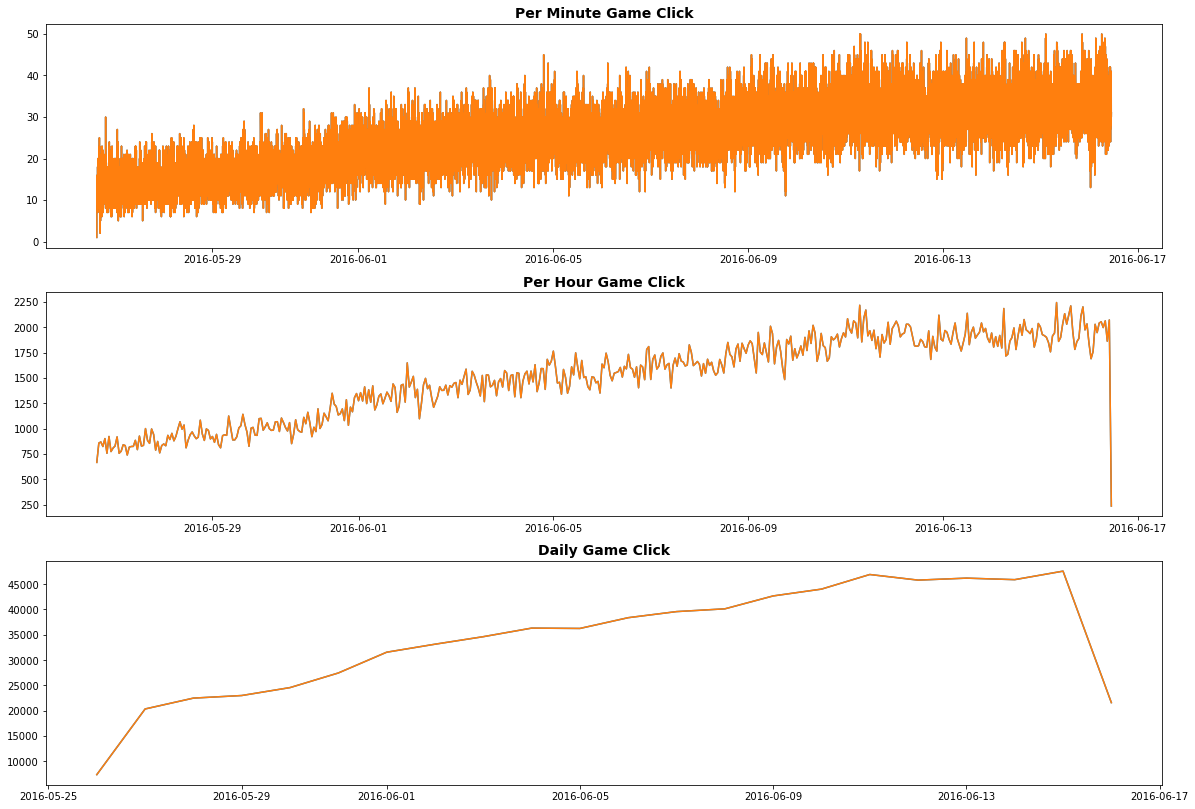

In [5]:
# time distriution GameClick 
tim = game.loc[:,['timestamp','isHit']]
tim.index = tim['timestamp']
# min
minute_count = tim.resample('60S').count()
hour_count = tim.resample('60min').count()
daily_count = tim.resample('D').count()
#plot Game Click
fig, ax = plt.subplots(3,figsize = (20,14))
ax[0].plot(minute_count);
ax[0].set_title('Per Minute Game Click',fontsize = 14, fontweight = 'bold' );
ax[1].plot (hour_count);
ax[1].set_title('Per Hour Game Click',fontsize = 14, fontweight = 'bold');
ax[2].plot(daily_count);
ax[2].set_title('Daily Game Click',fontsize = 14, fontweight = 'bold');

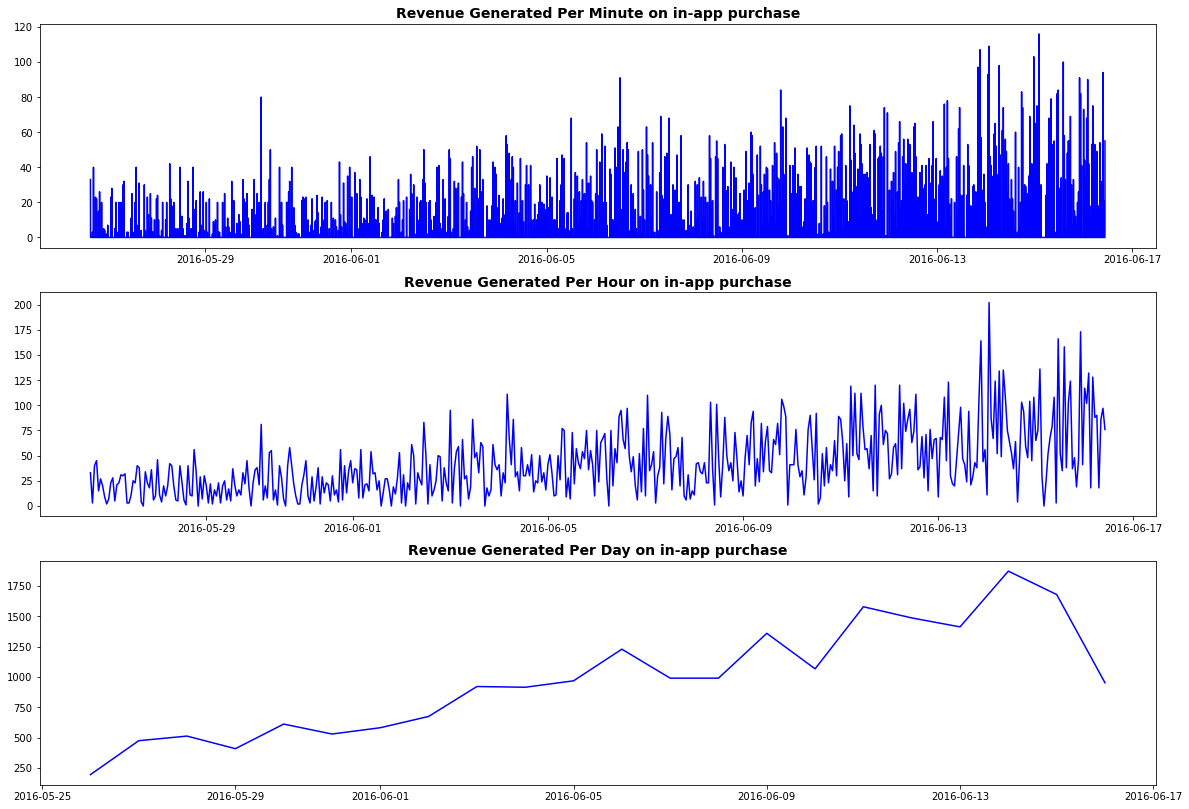

In [6]:
#revenue generated on in-app purchase 

rev = buy.loc[:,['timestamp','price']]
rev.index = rev['timestamp']

#resample
minute_sum = rev.resample('60S').sum()
hour_sum = rev.resample('60min').sum()
daily_sum = rev.resample('D').sum()

##plot 
fig, ax = plt.subplots(3,figsize = (20,14))
ax[0].plot(minute_sum,color = 'b');
ax[0].set_title('Revenue Generated Per Minute on in-app purchase',fontsize = 14, fontweight = 'bold');
ax[1].plot (hour_sum,color = 'b');
ax[1].set_title('Revenue Generated Per Hour on in-app purchase',fontsize = 14, fontweight = 'bold');
ax[2].plot(daily_sum,color = 'b');
ax[2].set_title('Revenue Generated Per Day on in-app purchase',fontsize = 14, fontweight = 'bold');


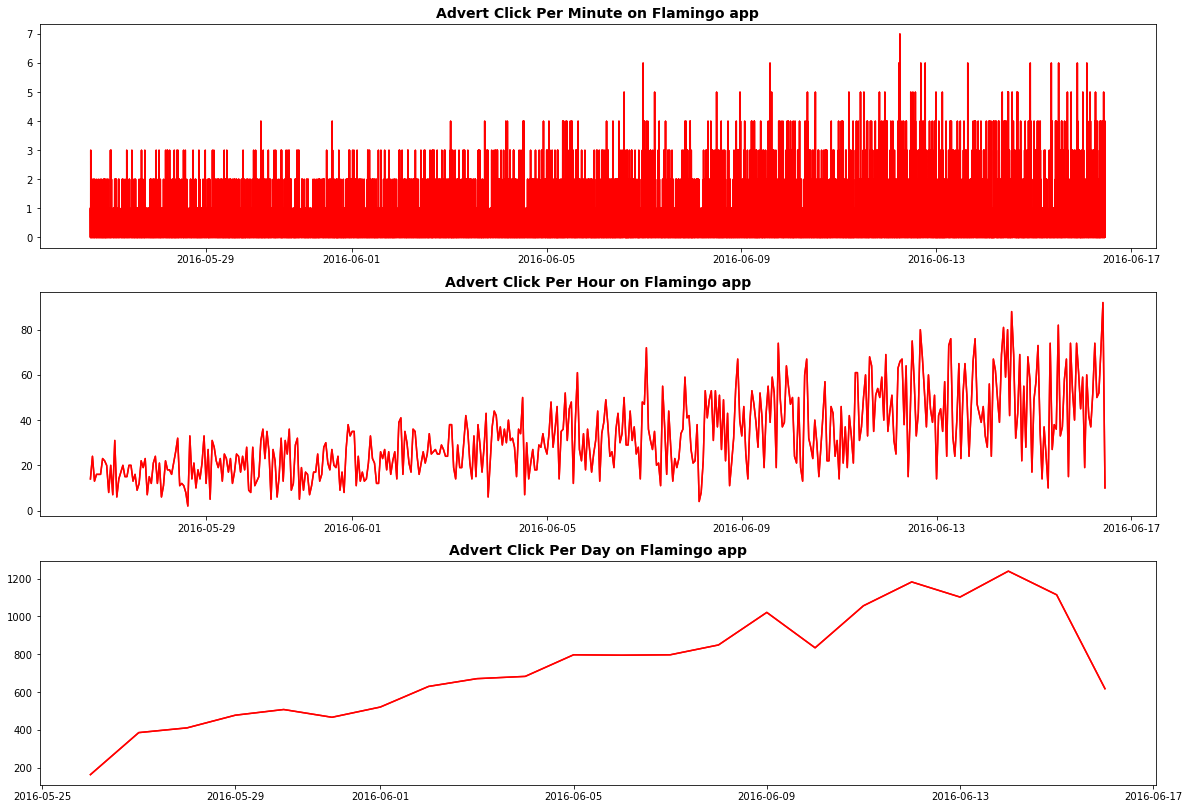

In [7]:
#advertisment click of flamingo app

adv = ad.loc[:,['timestamp','adId']]
adv.index = adv['timestamp']

#resample
advm_count = adv.resample('60S').count()
advh_count = adv.resample('60min').count()
advd_count = adv.resample('D').count()

##plot 
fig, ax = plt.subplots(3,figsize = (20,14))
ax[0].plot(advm_count,color = 'r');
ax[0].set_title('Advert Click Per Minute on Flamingo app',fontsize = 14, fontweight = 'bold');
ax[1].plot (advh_count,color = 'r');
ax[1].set_title('Advert Click Per Hour on Flamingo app',fontsize = 14, fontweight = 'bold');
ax[2].plot(advd_count,color = 'r');
ax[2].set_title('Advert Click Per Day on Flamingo app',fontsize = 14, fontweight = 'bold');


In [63]:
buy.head()

,timestamp,txId,userSessionId,team,userId,buyId,price,Item_pur
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0,Item_3
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0,Item_5
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0,Item_6
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0,Item_3
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0,Item_6


In [16]:
#for easy analysis and graphical display the item id in the data set was converted to aplhabet
mapp = {0: 'Item_1',
       1: 'Item_2',
       2: 'Item_3',
       3: 'Item_4',
       4: 'Item_5',
       5: 'Item_6'}
buy['Item_pur'] = buy['buyId'].map(mapp)

In [17]:
buy_dt = buy.groupby('Item_pur').aggregate({'price': 'sum'}).reset_index().sort_values(by='price',ascending = False)
buy_dt.columns = ['Item_Purchase','Revenue']

In [12]:
buy_dt = buy_dt.style.background_gradient(cmap='Reds')

In [13]:
buy_dt

,Item_Purchase,Revenue
5,Item_6,12200.000000
4,Item_5,4250.000000
2,Item_3,2142.000000
3,Item_4,1685.000000
0,Item_1,592.000000
1,Item_2,538.000000


In [18]:
fig = px.bar(buy_dt, x ="Item_Purchase",y="Revenue",color="Item_Purchase",text="Revenue",title="Revenue Generated Per Items")
fig.update_traces(textposition='outside')
fig.show()

Text(0.5, 1.0, 'Distribution of Item Purchase')

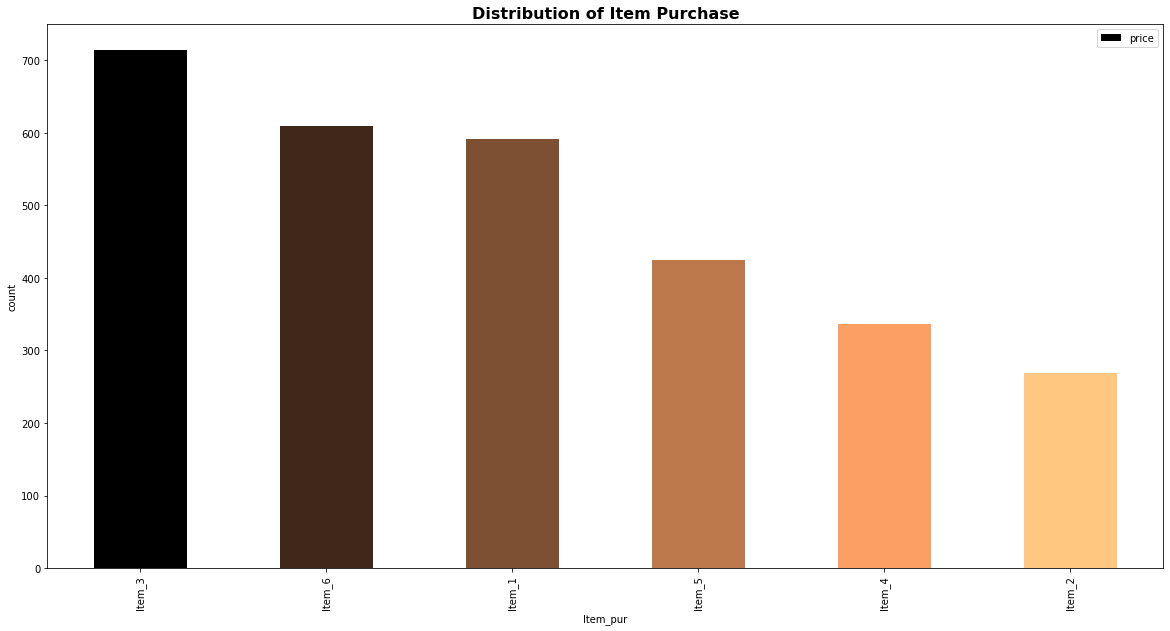

In [24]:
#group buy the id
tem = buy.groupby('Item_pur').count()['price']
tem = tem.sort_values(ascending = False)
tem = tem.reset_index ()
color = plt.cm.copper(np.linspace(0,1,6))
tem.plot(x = 'Item_pur', y = 'price', kind = 'bar', figsize = (20,10),color = color)
plt.ylabel('count')
plt.title('Distribution of Item Purchase', fontsize = 16, fontweight = 'bold')


In [42]:
mapping = {0: 'Missed_Flamingo',
           1: 'Flamingo'}
game['Hit_Game']= game['isHit'].map(mapping)

flam_count = game['Hit_Game'].value_counts()
flam_count = pd.DataFrame(flam_count)
flam_count = flam_count.reset_index()
flam_count.columns = ['type','count']

In [25]:
flam_count1 = game.groupby ('Hit_Game').count()['userId'].reset_index().sort_values(by = 'userId',ascending = False)

In [26]:
flam_count1

,Hit_Game,userId
1,Missed_Flamingo,672423
0,Flamingo,83383


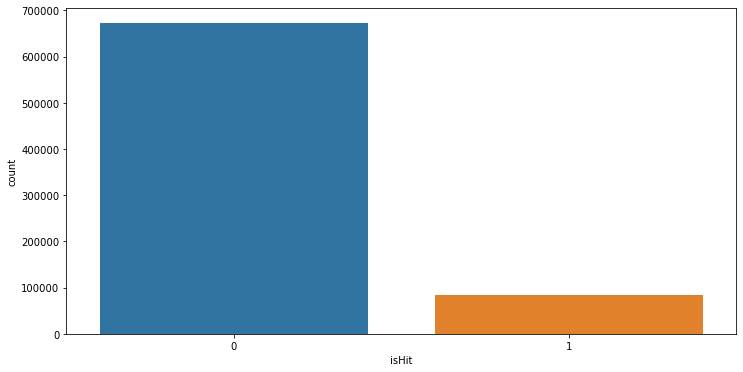

In [28]:
#plot Funel CHart for the Sentiment analysis 
plt.figure(figsize=(12,6))
sns.countplot(x = 'isHit', data = game)
fig = go.Figure(go.Funnelarea(
    text =flam_count1.Hit_Game,
    values = flam_count1.userId,
    title = {"position": "top center", "text": "Funnel-Chart of Game_Hit Distribution"}
    ))
fig.show()

In [43]:
game.head()

,timestamp,clickId,userId,userSessionId,isHit,teamId,teamLevel,Hit_Game
0,2016-05-26 15:06:55,105,1038,5916,0,25,1,Missed_Flamingo
1,2016-05-26 15:07:09,154,1099,5898,0,44,1,Missed_Flamingo
2,2016-05-26 15:07:14,229,899,5757,0,71,1,Missed_Flamingo
3,2016-05-26 15:07:14,322,2197,5854,0,99,1,Missed_Flamingo
4,2016-05-26 15:07:20,22,1362,5739,0,13,1,Missed_Flamingo


In [44]:
#click by level 
Table1 = pd.crosstab(game['teamLevel'],game['Hit_Game'])

In [48]:
Table1
Table1.style.background_gradient(cmap='Greens')

Hit_Game,Flamingo,Missed_Flamingo
teamLevel,,
1,7148,60123
2,8732,72218
3,10635,88188
4,12217,98959
5,12966,104133
6,13737,109020
7,12104,94332
8,5844,45450


In [31]:
#Most_Used PlatForm 
user_ses.head()

,timestamp,userSessionId,userId,teamId,assignmentId,sessionType,teamLevel,platformType
0,2016-05-26 14:47:30,5675,170,90,5423,start,1,iphone
1,2016-05-27 00:06:54,5675,170,90,5423,end,1,iphone
2,2016-05-26 14:43:09,5795,835,39,5300,start,1,android
3,2016-05-27 08:06:54,5795,835,39,5300,end,1,android
4,2016-05-26 14:47:20,5833,624,2,5529,start,1,iphone


In [33]:
platf = user_ses.groupby('platformType').count()['userId'].reset_index().sort_values(by ='userId', ascending = False)

In [36]:
platf.columns = ['platformType','count']

In [38]:
#plot of most used platform 
fig = px.bar(platf, x ="count",y="platformType",color="platformType",text="count",title="Most Used Platform")
fig.update_traces(textposition='outside')
fig.show()

In [49]:
ad.head()

,timestamp,txId,userSessionId,teamId,userId,adId,adCategory
0,2016-05-26 15:13:22,5974,5809,27,611,2,electronics
1,2016-05-26 15:17:24,5976,5705,18,1874,21,movies
2,2016-05-26 15:22:52,5978,5791,53,2139,25,computers
3,2016-05-26 15:22:57,5973,5756,63,212,10,fashion
4,2016-05-26 15:22:58,5980,5920,9,1027,20,clothing


In [50]:
ad['adCategory'].value_counts()

computers      2638
games          2601
clothing       2340
sports         2074
fashion        1727
movies         1692
hardware       1588
electronics    1097
automotive      566
Name: adCategory, dtype: int64

In [51]:
#dataframe for most adclick 
ad_plt = ad.groupby('adCategory').count()['userId'].reset_index().sort_values(by = 'userId',ascending = False)

In [53]:
ad_plt.columns = ['adCategory','count']

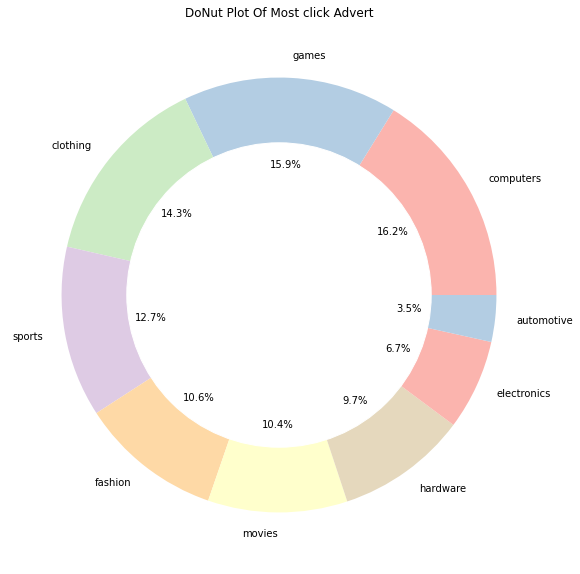

In [54]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(ad_plt['count'], labels=ad_plt.adCategory, colors=Pastel1_7.hex_colors,autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Most click Advert')
plt.show()

In [78]:
## Exploring the Combined DataSet
cmb_dt.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
0,812,5648,1,android,69,8,NaN,NaN
1,1658,5649,1,iphone,31,5,NaN,NaN
2,1589,5650,1,iphone,26,2,NaN,NaN
3,1863,5651,1,android,35,4,NaN,NaN
4,937,5652,1,android,39,0,1.0,1.0


In [25]:
#Handling Missing value 
'''
input: Dataset set of row by column 
purpose: calculate the total and percentage of missing value in the data set 
output: Table that contain total number and percentage of missing value by column
'''
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [27]:
table1 = missing_data(cmb_dt)

In [28]:
table1.to_excel('missing.xlsx')

## **Report**
> Report from the table above display the total number and percentage of missing value in the data combined data set, from the data set its noted that all the columns have zero number and percentage of missing value expect column **count_buyId** and **avg_price** with 69.45% missing value. this implies that more than half of the data set in the column were missing. Hence, for this study we going to drop the two columns

In [41]:
#drop the columns 
cmb_nw = cmb_dt.drop(['avg_price','count_buyId'],axis = 1)

In [42]:
cmb_nw.head()

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits
0,812,5648,1,android,69,8
1,1658,5649,1,iphone,31,5
2,1589,5650,1,iphone,26,2
3,1863,5651,1,android,35,4
4,937,5652,1,android,39,0


In [43]:
#To confirm the data set
cmb_nw.isnull().any()

userId              False
userSessionId       False
teamLevel           False
platformType        False
count_gameclicks    False
count_hits          False
dtype: bool

In [32]:
#describe the data set 
table2 = cmb_nw.describe()

In [33]:
table2.to_excel('descrip.xlsx')

In [89]:
cmb_nw.columns 

Index(['userId', 'userSessionId', 'teamLevel', 'platformType',
       'count_gameclicks', 'count_hits'],
      dtype='object')

In [92]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='platformType', ylabel='count_gameclicks'>

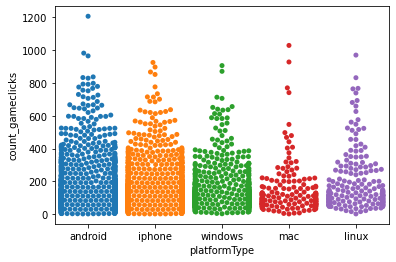

In [93]:
#swarmp
sns.swarmplot(x='platformType',y = 'count_gameclicks', data = cmb_nw)

<AxesSubplot:xlabel='platformType', ylabel='count_gameclicks'>

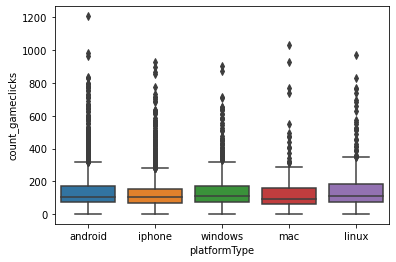

In [94]:
sns.boxplot(x='platformType',y = 'count_gameclicks', data = cmb_nw)

In [ ]:
#Histogram
sns.histplot()

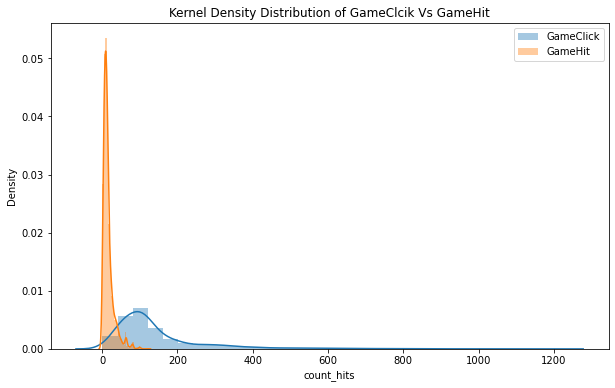

In [98]:
#Distribution
plt.figure (figsize = (10,6))
sns.distplot (cmb_nw['count_gameclicks'], bins = 30, label = 'GameClick')
sns.distplot(cmb_nw['count_hits'], bins = 30,label ='GameHit')
plt.title('Kernel Density Distribution of GameClcik Vs GameHit')
plt.legend()

<AxesSubplot:xlabel='count_hits', ylabel='Count'>

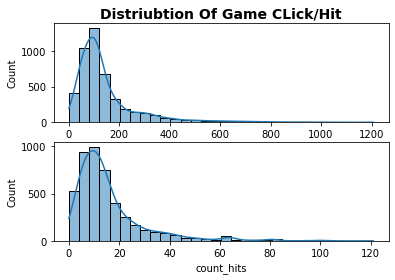

In [113]:
plt.subplot(2,1,1)
plt.title('Distriubtion Of Game CLick/Hit',fontsize=14,fontweight='bold')
sns.histplot(cmb_nw['count_gameclicks'],bins = 30,kde = True)

plt.subplot(2,1,2)
sns.histplot(cmb_nw['count_hits'], bins = 30, kde = True)
#plt.title ('Distribution of count_Hit')

In [114]:
cmb_nw.columns

Index(['userId', 'userSessionId', 'teamLevel', 'platformType',
       'count_gameclicks', 'count_hits'],
      dtype='object')

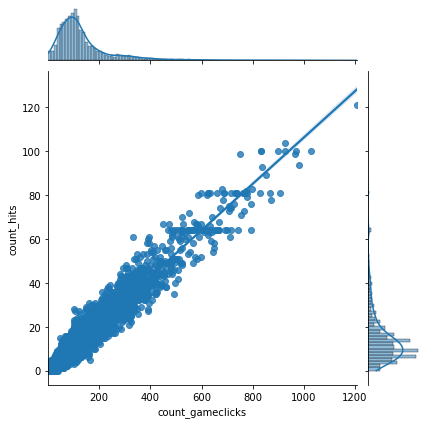

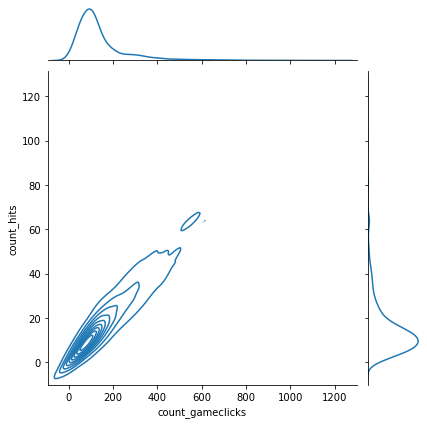

In [123]:
sns.jointplot (x= 'count_gameclicks',y='count_hits',kind ='reg',data = cmb_nw)
sns.jointplot (x= 'count_gameclicks',y='count_hits',kind ='kde',data = cmb_nw)

In [38]:
cmb_nw.head()

,teamLevel,platformType,count_gameclicks,count_hits,HitCount_Type
0,1,android,69,8,LowHit_count
1,1,iphone,31,5,LowHit_count
2,1,iphone,26,2,LowHit_count
3,1,android,35,4,LowHit_count
4,1,android,39,0,LowHit_count


## **Feature Engineering** 
> This section describe the creation and manipulation of feauters and target variables, here the target variable will be created and use to expolre the data set for more comprehensive view about the data set 
>> From the data set summary about 4619 user session record various number of hit_count on flamingo, with maximum value of 121 counts and minimum value of 0, which implies that some user record high hit count on flamingo in respective of the level than others. Hence, its essential to identify users who are more likely to have high hit_counts and those with low counts.
In light of this, users are divided into three category with respect to the hit_counts using the median value (12) as threshold. user with hit_count greater than 12 is **HighHit_count** , less than 12 hit_count is **LowHit_count**, while user with 12 hit count are **NormalHit_count**.
>>> Userid and Usersession columns are dropped.This result from the fact, userid and usersessionid has no effect on the classfication, as both of them are means of identificatio.

In [45]:
count2 =cmb_nw.groupby ('HitCount_Type').count()['userId'].reset_index().sort_values(by = 'userId',ascending = False)

In [47]:
count2.head()

,HitCount_Type,userId
1,LowHit_count,2223
0,HighHIt_count,2149
2,NormalHit_count,247


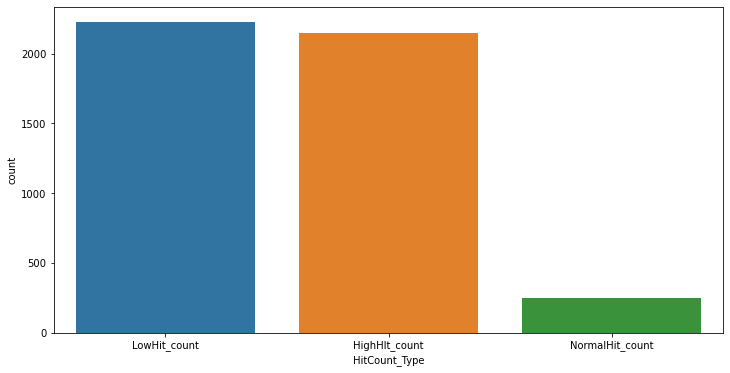

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'HitCount_Type', data = cmb_nw)
fig = go.Figure(go.Funnelarea(
    text =count2.HitCount_Type,
    values = count2.userId,
    title = {"position": "top center", "text": "Funnel-Chart of Hit Type"}
    ))
fig.show()

In [44]:
#creation of new column 
cmb_nw['HitCount_Type'] = np.where(cmb_nw['count_hits'] >12,'HighHIt_count',np.where(cmb_nw['count_hits']<12,'LowHit_count','NormalHit_count'))

In [35]:
#drop userid and usersessionid
cmb_nw = cmb_nw.drop(['userId','userSessionId'], axis = 1)

In [36]:
#display head 
cmb_nw.head()

,teamLevel,platformType,count_gameclicks,count_hits,HitCount_Type
0,1,android,69,8,LowHit_count
1,1,iphone,31,5,LowHit_count
2,1,iphone,26,2,LowHit_count
3,1,android,35,4,LowHit_count
4,1,android,39,0,LowHit_count


In [144]:
cmb_nw.to_csv('cmb_data.csv')

<AxesSubplot:xlabel='count_gameclicks', ylabel='HitCount_Type'>

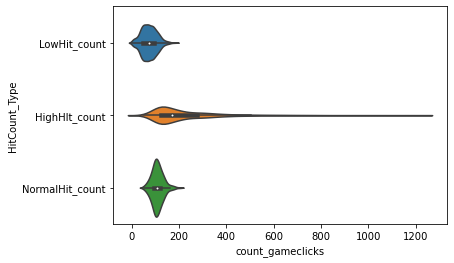

In [127]:
#Gameclick count for various Hicount_type
sns.violinplot(x= 'count_gameclicks',y='HitCount_Type', data = cmb_nw)

In [37]:
count2 =cmb_nw.groupby ('HitCount_Type').count()['userId'].reset_index().sort_values(by = 'userId',ascending = False)

KeyError: 'userId'

<AxesSubplot:xlabel='platformType', ylabel='count'>

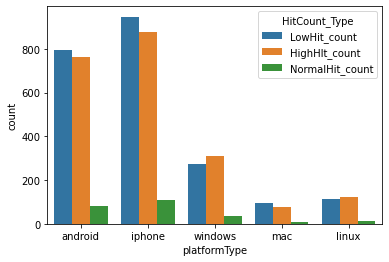

In [135]:
sns.countplot(x ='platformType', hue = 'HitCount_Type', data = cmb_nw)

In [131]:
dt = cmb_nw.loc[:,['count_gameclicks','count_hits','HitCount_Type']]

Text(0.5, 1.0, 'scatter plot Distribution of HitCount_Type')

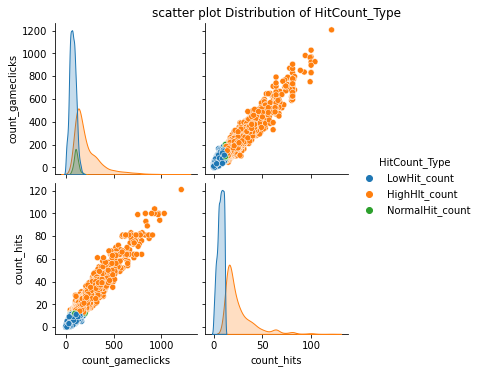

In [134]:
sns.pairplot(dt,hue = 'HitCount_Type')
plt.title ('scatter plot Distribution of HitCount_Type')

In [145]:
#Transformation of Data Set
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
col=[col for col in cmb_nw.columns if cmb_nw[col].dtype=='O']
for c in col:
    cmb_nw[c]=encoder.fit_transform(cmb_nw[c])
    

In [146]:
cmb_nw.head()

,teamLevel,platformType,count_gameclicks,count_hits,HitCount_Type
0,1,0,69,8,1
1,1,1,31,5,1
2,1,1,26,2,1
3,1,0,35,4,1
4,1,0,39,0,1


In [147]:
#correlation matrix 
cor_tab = cmb_nw.corr ()

In [148]:
cor_tab

,teamLevel,platformType,count_gameclicks,count_hits,HitCount_Type
teamLevel,1.000000,-0.006226,-0.080415,-0.058090,-0.071479
platformType,-0.006226,1.000000,0.013361,0.009758,-0.012621
count_gameclicks,-0.080415,0.013361,1.000000,0.959317,-0.513652
count_hits,-0.058090,0.009758,0.959317,1.000000,-0.569840
HitCount_Type,-0.071479,-0.012621,-0.513652,-0.569840,1.000000


<AxesSubplot:>

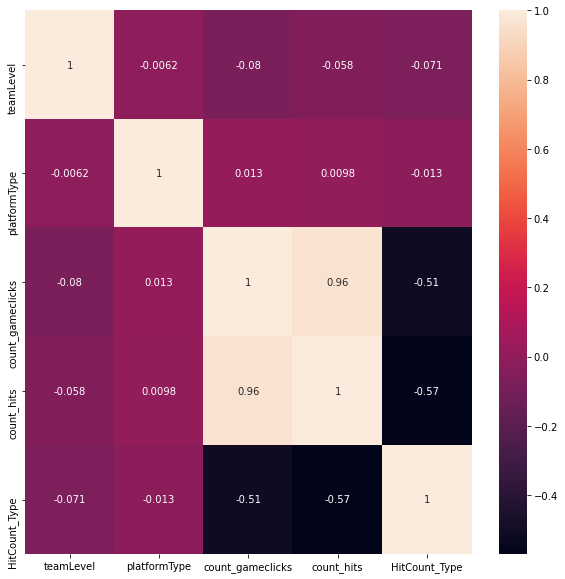

In [149]:
plt.figure(figsize=(10,10))
sns.heatmap(cor_tab, annot = True)

In [124]:
import numpy as np  

In [3]:
#import pyspark library 
import pyspark 

In [4]:
#start session with pyspark 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('rough').getOrCreate()

In [5]:
#spark version 
spark